In [348]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
import sklearn.metrics

In [349]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submit = pd.read_csv('gender_submission.csv')

In [350]:
display(submit.head())

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [351]:
display(train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [352]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [353]:
display(train.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Quick EDA summary here

In [354]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [355]:
train['Pclass'].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [356]:
train['Sex'].value_counts(normalize=True
                          )

male      0.647587
female    0.352413
Name: Sex, dtype: float64

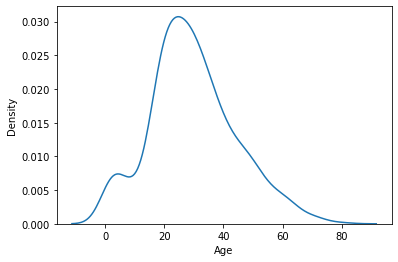

In [357]:
sns.kdeplot(x='Age', data=train)
plt.show()

681


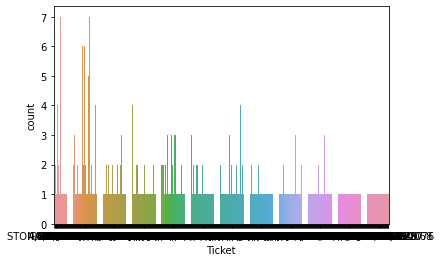

In [358]:
print(len(train['Ticket'].unique()))
sns.countplot(x='Ticket', data=train)
plt.show()

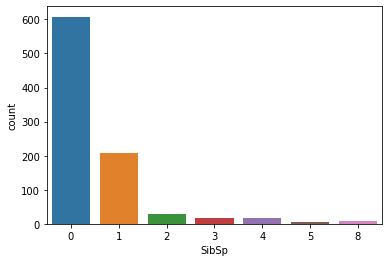

In [359]:
sns.countplot(x='SibSp', data=train)
plt.show()

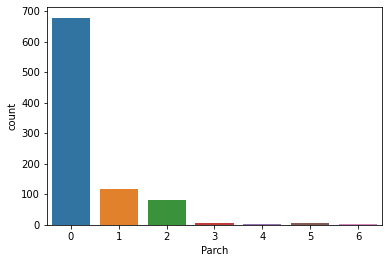

In [360]:
sns.countplot(x='Parch', data=train)
plt.show()

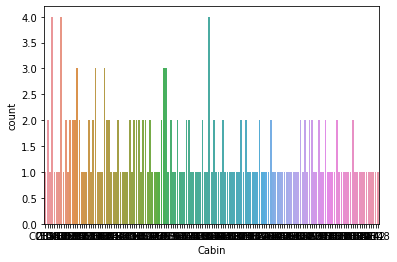

In [361]:
sns.countplot(x='Cabin', data=train)
plt.show()

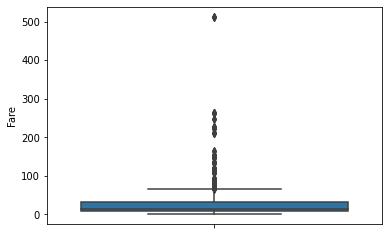

In [362]:
sns.boxplot(y='Fare', data=train)
plt.show()

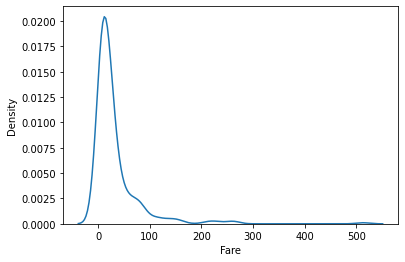

In [363]:
sns.kdeplot(x='Fare', data=train)
plt.show()

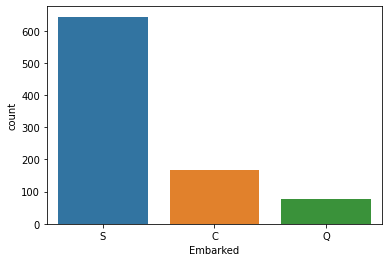

In [364]:
sns.countplot(x='Embarked', data=train)
plt.show()

Just in case you care,
* What moves the price of Fare? Pclass?, Age? What?

What we care about now is *'what features really matter to survival?'*

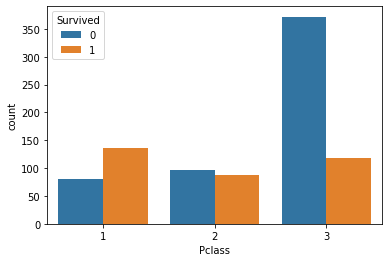

In [365]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.show()

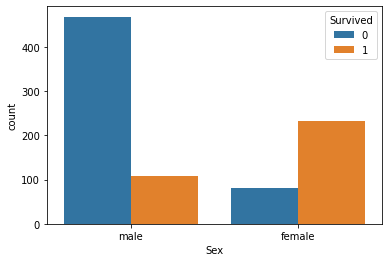

In [366]:
sns.countplot(x='Sex', hue='Survived', data=train)
plt.show()

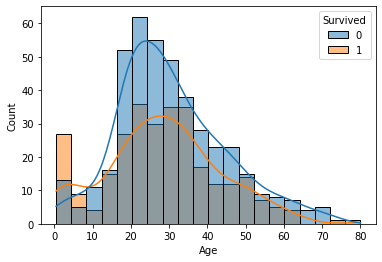

In [367]:
sns.histplot(x='Age', hue='Survived', data=train, kde=True)
plt.show()

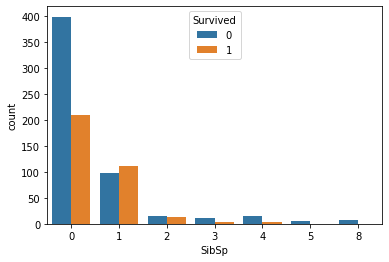

In [368]:
sns.countplot(x='SibSp', hue='Survived', data=train)
plt.show()

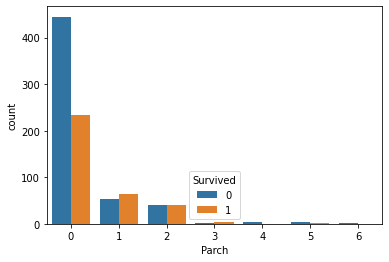

In [369]:
sns.countplot(x='Parch', hue='Survived', data=train)
plt.show()

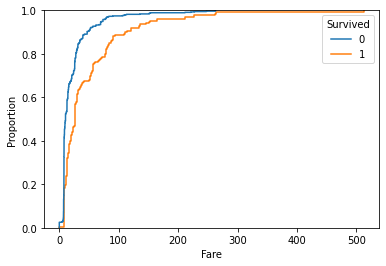

In [370]:
sns.ecdfplot(x='Fare', hue='Survived', data=train)
plt.show()

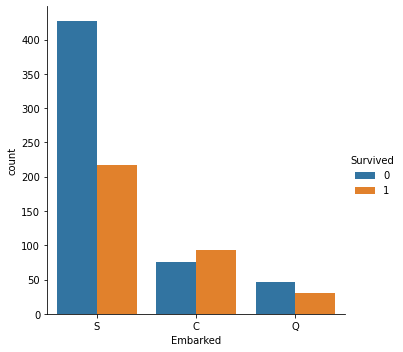

In [371]:
sns.catplot(x='Embarked', hue='Survived', data=train, kind='count')
plt.show()

Let's fix our missing data points.


Age has missing points, let's impute the mean for those missing points.
Cabin has so much missing data that we are going to make NaN itself a class.
Embarked has missing points too, we will fill in the most common, that is S.

In [372]:
train['Age'].replace(to_replace=np.NaN, value=train['Age'].mean(), inplace=True)
train['Cabin'].replace(to_replace=np.NaN, value='special_cabin', inplace=True)
train['Embarked'].replace(to_replace=np.NaN, value='S', inplace=True)

test['Age'].replace(to_replace=np.NaN, value=train['Age'].mean(), inplace=True)
test['Cabin'].replace(to_replace=np.NaN, value='special_cabin', inplace=True)
test['Embarked'].replace(to_replace=np.NaN, value='S', inplace=True)

In [373]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

Now, we encode the numeric characters

There are so many names, cabin and tickets that we cannot encode them. We just have to drop them.

In [374]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [375]:
train[['Age', 'SibSp',	'Parch',	'Fare',	'Survived_1',	'Pclass_2',	'Pclass_3',	'Sex_male',	'Embarked_Q',	'Embarked_S']] = pd.get_dummies(data=train, columns=['Survived', 'Pclass', 'Sex', 'Embarked'], drop_first=True)
test[['Age', 'SibSp',	'Parch',	'Fare',	'Pclass_2',	'Pclass_3',	'Sex_male',	'Embarked_Q',	'Embarked_S']] = pd.get_dummies(data=test, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)

In [376]:
display(train.head())
display(test.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_1,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,S,0,0,1,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,1,0,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,0,1,1,0,1


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,3,male,34.5,0,0,7.8292,Q,0,1,1,1,0
1,3,female,47.0,1,0,7.0000,S,0,1,0,0,1
2,2,male,62.0,0,0,9.6875,Q,1,0,1,1,0
3,3,male,27.0,0,0,8.6625,S,0,1,1,0,1
4,3,female,22.0,1,1,12.2875,S,0,1,0,0,1


In [377]:
y = train.pop('Survived_1')
X = train.drop(['Survived', 'Pclass','Sex', 'Embarked'], axis=1)
test.drop(['Pclass','Sex', 'Embarked'], axis=1, inplace=True)
display(X.head())
display(y.head())

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,1,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,1,0,1


0    0
1    1
2    1
3    1
4    0
Name: Survived_1, dtype: uint8

In [378]:
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=.2, random_state=123, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_hold, y_hold, test_size=.5, random_state=123)

Let's define an assessment function

In [379]:
def assess(model):
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    val_acc = model.score(X_val, y_val)
    df = pd.DataFrame([train_acc, test_acc, val_acc], index=['train_acc', 'test_acc', 'val_acc'])
    display(df)
    
def deep_asess(model, true, train):
    print(sklearn.metrics.confusion_matrix(true, model.predict(train)))
    print(sklearn.metrics.classification_report(true, model.predict(train)))
    
def make_csv(model, to_be_predicted, name='default.csv'):
    dafa = pd.DataFrame({
        'PassengerId': test['PassengerId'],
        'Survived': model.predict(to_be_predicted)
    })
    dafa.to_csv(name, index=False)

LinReg first...

In [385]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

assess(log_reg)
deep_asess(log_reg, y_val, X_val)

,0
train_acc,0.801966
test_acc,0.842697
val_acc,0.811111


[[49  7]
 [10 24]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        56
           1       0.77      0.71      0.74        34

    accuracy                           0.81        90
   macro avg       0.80      0.79      0.80        90
weighted avg       0.81      0.81      0.81        90



In [437]:
dtc = DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=123)
dtc.fit(X_train, y_train)

assess(dtc)

,0
train_acc,0.831461
test_acc,0.820225
val_acc,0.822222


In [438]:
etc = ExtraTreeClassifier(splitter='best', max_depth=4, min_samples_leaf=2, random_state=123)
etc.fit(X_train, y_train)

assess(etc)

,0
train_acc,0.832865
test_acc,0.808989
val_acc,0.811111
